# **Solar Data Discovery** 

## **Togo Data Profiling, Cleaning, and EDA**

In [2]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
# Reading DataSets 
togo_data = pd.read_csv("../datas/togo-dapaong_qc.csv", parse_dates=['Timestamp'],date_format="%y %m %d %h %m")


### Data Profiling

In [4]:
# display the first 10 records
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
# display the last 10 records 
togo_data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN
525599,2022-10-25 00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [6]:
# display the shape of the data to get info about number features and instance 
print(f"sierraleone Solar data Information: ")
print(f"Instances: {togo_data.shape[0]} records ")
print(f"Features:  {togo_data.shape[1] } columns")

sierraleone Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [7]:
# Dataset information about type of each columns, size 
togo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [8]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': togo_data.columns,
    '# of unique': togo_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8633
DNI,DNI,9612
DHI,DHI,6841
ModA,ModA,10672
ModB,ModB,8439
Tamb,Tamb,266
RH,RH,966
WS,WS,143
WSgust,WSgust,156


In [9]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {togo_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in togo_data.columns:
    percent =(togo_data[col].isna().sum()/togo_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [10]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    'columns':togo_data.columns,
    '# missing': togo_data.isna().sum(), 
    '% missing': togo_data.isna().mean()*100
})
no_missing

,columns,# missing,% missing
Timestamp,Timestamp,0,0.0
GHI,GHI,0,0.0
DNI,DNI,0,0.0
DHI,DHI,0,0.0
ModA,ModA,0,0.0
ModB,ModB,0,0.0
Tamb,Tamb,0,0.0
RH,RH,0,0.0
WS,WS,0,0.0
WSgust,WSgust,0,0.0


In [11]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {togo_data.duplicated().sum()}".center(150))
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        
                                                    Number of Duplicated values in the dataset: 0                                                     


In [12]:
# finding negative values 
negative_values = pd.DataFrame({
    'columns': togo_data.columns,
    'dtypes': togo_data.dtypes,
    'num of -ve values': togo_data.select_dtypes(include='number').lt(0).sum(),
    "% of -ve values": round(togo_data.select_dtypes(include='number').lt(0).mean() *100, 2),
})

negative_values

,columns,dtypes,num of -ve values,% of -ve values
BP,Timestamp,int64,0.0,0.00
Cleaning,GHI,int64,0.0,0.00
Comments,DNI,float64,0.0,0.00
DHI,DHI,float64,0.0,0.00
DNI,ModA,float64,0.0,0.00
GHI,ModB,float64,257385.0,48.97
ModA,Tamb,float64,0.0,0.00
ModB,RH,float64,0.0,0.00
Precipitation,WS,float64,0.0,0.00
RH,WSgust,float64,0.0,0.00


In [13]:
# Statistical Summery 
togo_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records
  -  The Dataset has 

### EDA Univariate Analysis

In [14]:
import matplotlib.pyplot as plt
# import seaborn as sbn

Looking for outlines, missing values and incorrect entries on `GHI, DNI, DHI`and outlier on `ModB, ModA` and wend speed data `WS, and WSgust`

In [15]:
# checking incorrect entries of GHI, DNI, and DHI
togo_data[['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']].describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,230.555040,151.258469,116.444352,226.144375,219.568588,2.368093,3.229490
std,322.532347,250.956962,156.520714,317.346938,307.932510,1.462668,1.882565
min,-12.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,1.400000,1.900000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,2.200000,2.900000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,3.200000,4.400000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,16.100000,23.100000


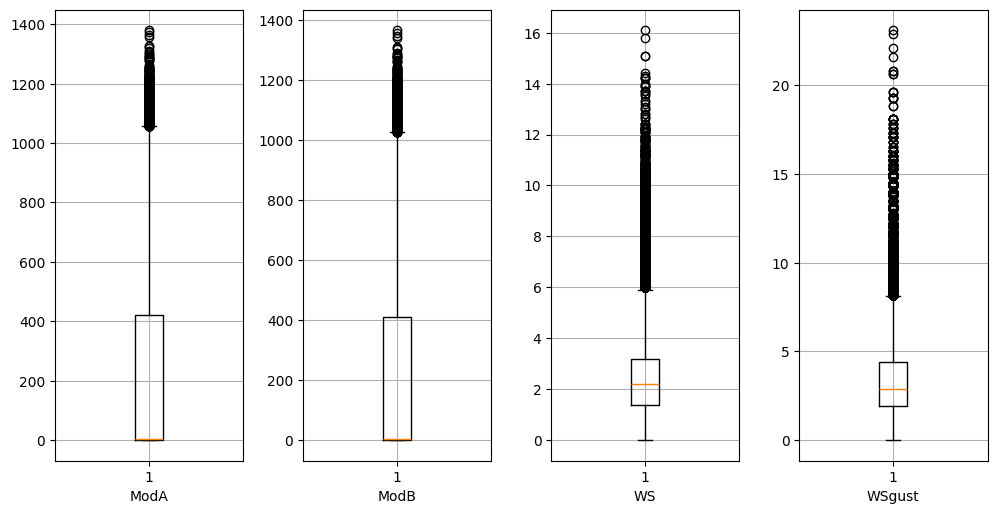

In [16]:
# checking for outliers for Modb, and ModA, WS, WSgust using boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(['ModA', 'ModB', 'WS', 'WSgust'], start = 1):
    plt.subplot(3,8,i)
    plt.boxplot(togo_data[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

## Enter Quantile Range 

In [17]:
column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(togo_data[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(togo_data[column]).sum(),
    '% of Outlier': round(IQR_outlier(togo_data[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,1303,0.25
DNI,DNI,50586,9.62
DHI,DHI,7905,1.50
ModA,ModA,1237,0.24
ModB,ModB,1537,0.29
WS,WS,8708,1.66
WSgust,WSgust,7377,1.40


## Checking Outliers with Z Score

In [18]:
from scipy.stats import zscore
import numpy as np
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(togo_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier



,column,# of outlier,% of Outlier
0,DHI,3415,0.65
1,GHI,305,0.06
2,DNI,1062,0.20
3,ModA,137,0.03
4,ModB,206,0.04
5,WS,3510,0.67
6,WSgust,3915,0.74


In [19]:
# Replace outliers with median
for col in cols:
    median_value = togo_data[col].median()
    togo_data.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [mask.sum() for mask in outlier_z_score.values()],
    '% of Outliers': [round(mask.mean() * 100, 2) for mask in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           3415           0.65
1     GHI            305           0.06
2     DNI           1062           0.20
3    ModA            137           0.03
4    ModB            206           0.04
5      WS           3510           0.67
6  WSgust           3915           0.74


In [21]:
togo_data.to_csv("../datas/Clean_togo_data.csv", index =False)

In [22]:
clean_togo_data = pd.read_csv("../datas/Clean_togo_data.csv", parse_dates=['Timestamp'],date_format="%y %m %d %h %m")

## Time Series Analysis

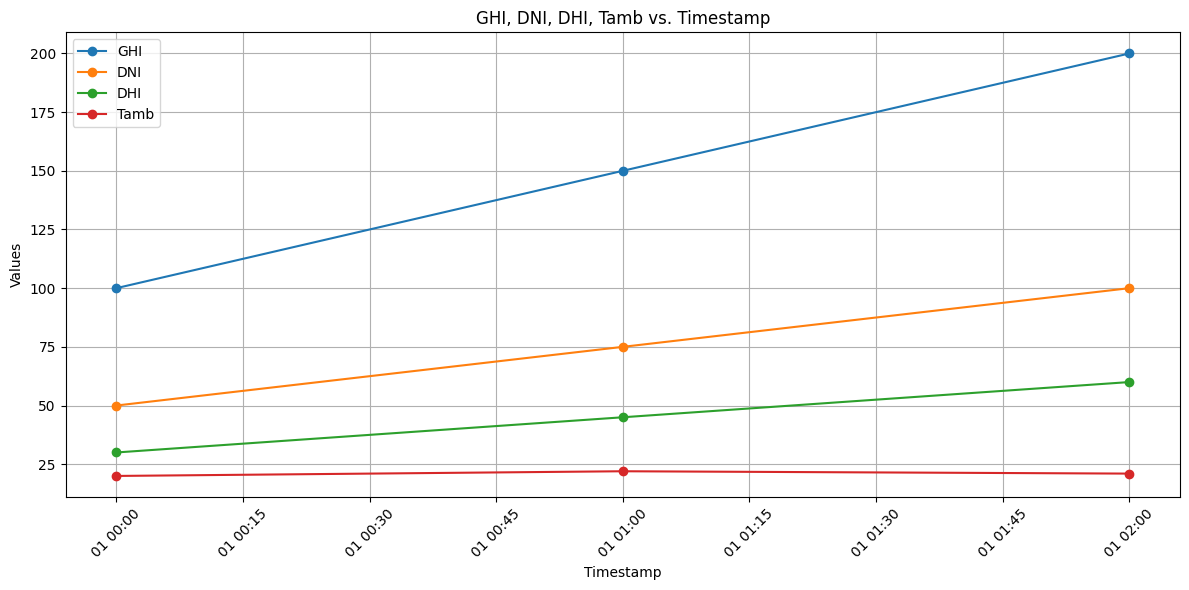

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Timestamp': ['2023-01-01 00:00', '2023-01-01 01:00', '2023-01-01 02:00'],
    'GHI': [100, 150, 200],
    'DNI': [50, 75, 100],
    'DHI': [30, 45, 60],
    'Tamb': [20, 22, 21]
}

df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(12, 6))

# Line chart
plt.plot(df['Timestamp'], df['GHI'], label='GHI', marker='o')
plt.plot(df['Timestamp'], df['DNI'], label='DNI', marker='o')
plt.plot(df['Timestamp'], df['DHI'], label='DHI', marker='o')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', marker='o')

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GHI, DNI, DHI, Tamb vs. Timestamp')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

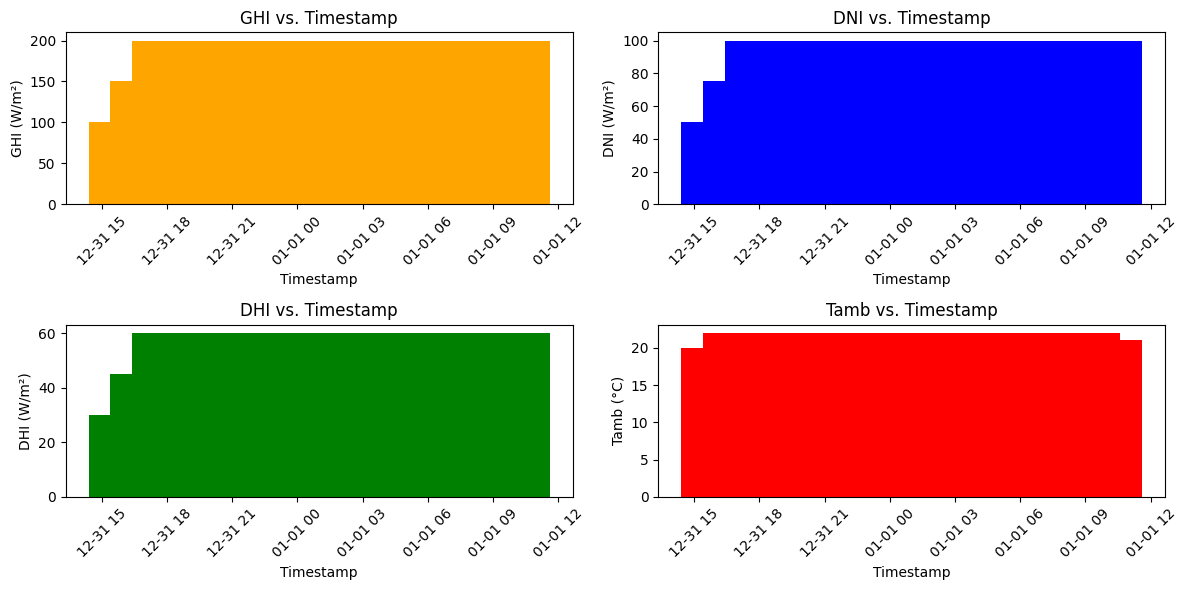

In [44]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Bar chart for GHI
plt.subplot(2, 2, 1)
plt.bar(df['Timestamp'], df['GHI'], color='orange')
plt.title('GHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for DNI
plt.subplot(2, 2, 2)
plt.bar(df['Timestamp'], df['DNI'], color='blue')
plt.title('DNI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for DHI
plt.subplot(2, 2, 3)
plt.bar(df['Timestamp'], df['DHI'], color='green')
plt.title('DHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)

# Bar chart for Tamb
plt.subplot(2, 2, 4)
plt.bar(df['Timestamp'], df['Tamb'], color='red')
plt.title('Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 

In [45]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [26]:

df['Month'] = df['Timestamp'].dt.month
# Group by month and calculate the mean
monthly_avg = df.groupby('Month')[['GHI','DHI','DNI','Tamb']].mean()
monthly_avg

,GHI,DHI,DNI,Tamb
Month,,,,
1,150.0,45.0,75.0,21.0


In [27]:
# Add an 'Hour' column
df['Hour'] = df['Timestamp'].dt.hour

# Group by hour and calculate the mean
hourly_avg = df.groupby('Hour')[['GHI','DHI','DNI','Tamb']].mean()

In [28]:
from scipy import stats
# Calculate Z-scores for GHI
df['GHI_Z'] = stats.zscore(df['GHI'])
anomalies = df[df['GHI_Z'].abs() > 2]

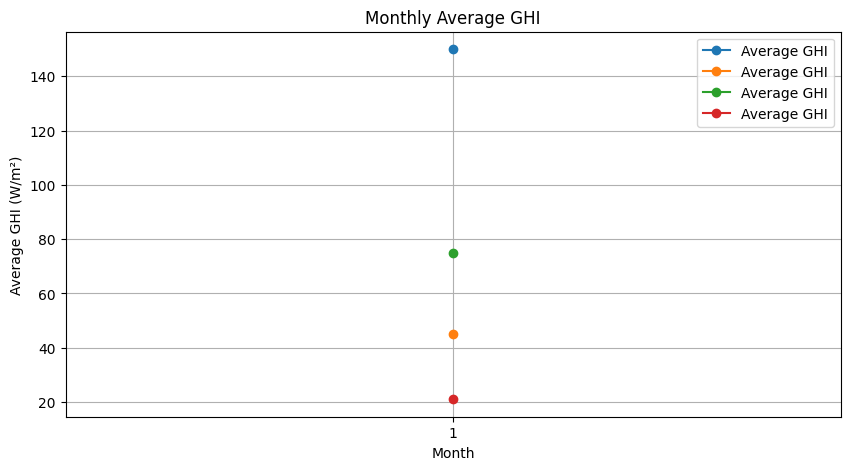

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[['GHI','DHI','DNI','Tamb']], marker='o', label='Average GHI')
plt.title('Monthly Average GHI')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(monthly_avg.index)
plt.legend()
plt.grid()
plt.show()

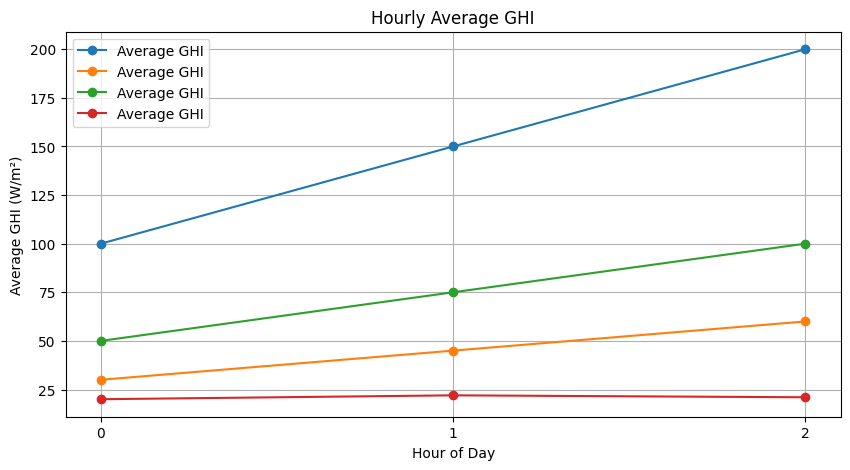

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg[['GHI','DHI','DNI','Tamb']], marker='o', label='Average GHI')
plt.title('Hourly Average GHI')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(hourly_avg.index)
plt.legend()
plt.grid()
plt.show()

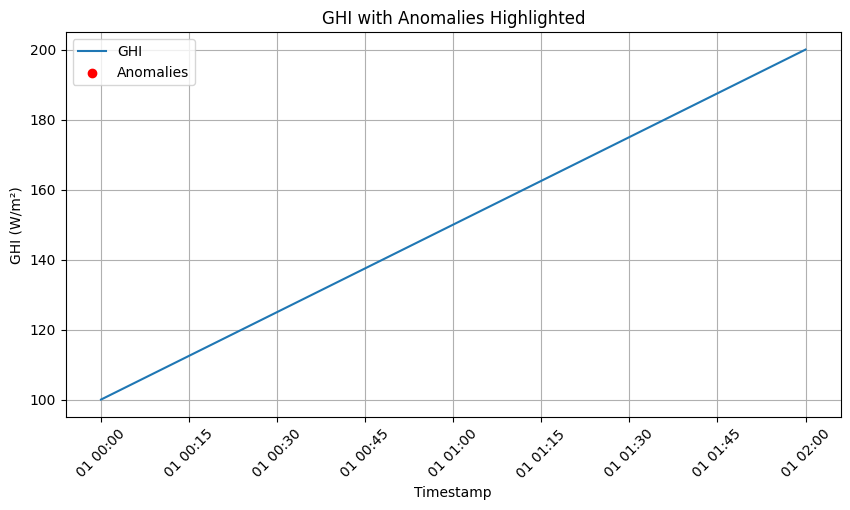

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.scatter(anomalies['Timestamp'], anomalies['GHI'], color='red', label='Anomalies')
plt.title('GHI with Anomalies Highlighted')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [32]:
togo_data.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

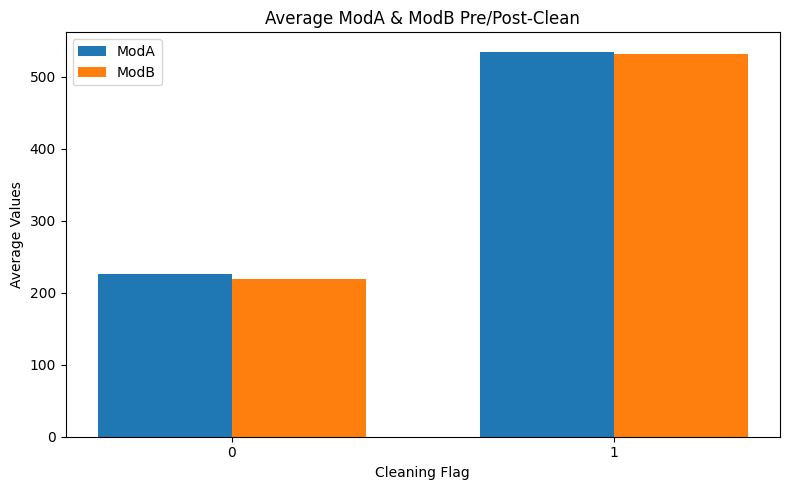

In [33]:
averages = togo_data.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
# Set the figure size
plt.figure(figsize=(8, 5))

# Bar plot
bar_width = 0.35
index = range(len(averages))

# Creating bars
bar1 = plt.bar(index, averages['ModA'], bar_width, label='ModA')
bar2 = plt.bar([i + bar_width for i in index], averages['ModB'], bar_width, label='ModB')

# Adding labels and title
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.title('Average ModA & ModB Pre/Post-Clean')
plt.xticks([i + bar_width / 2 for i in index], averages['Cleaning'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## Cleaning Impact

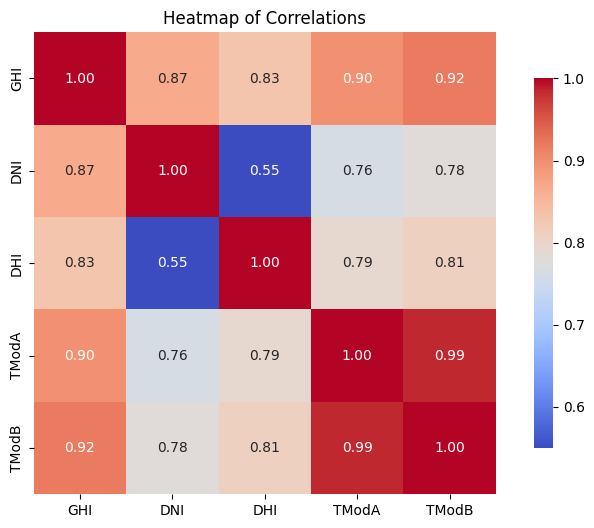

In [34]:
import seaborn as sns
# Select relevant columns
data = togo_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Heatmap of Correlations')

# Display the plot
plt.show()


## Correlation & Relationship Analysis

Heatmap of correlations (GHI, DNI, DHI, TModA, TModB)

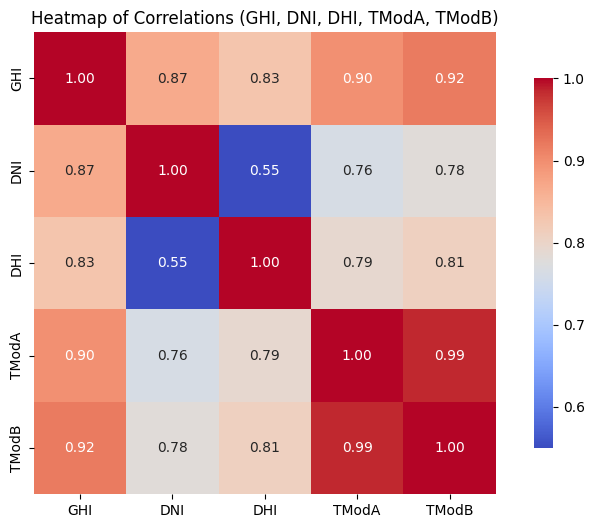

In [46]:
data = clean_togo_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]
correlation_matrix = data.corr()
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Adding title
plt.title('Heatmap of Correlations (GHI, DNI, DHI, TModA, TModB)')

# Display the plot
plt.show()

### Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI.

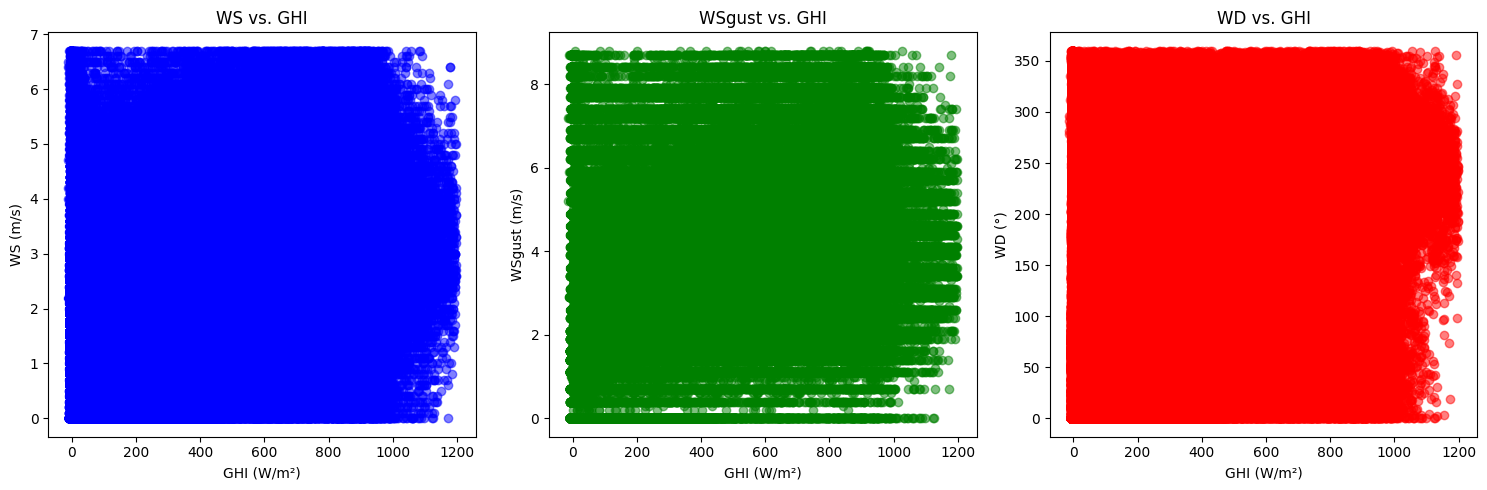

In [52]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Scatter plot for WS vs. GHI
plt.subplot(1, 3, 1)
plt.scatter(clean_togo_data['GHI'], clean_togo_data['WS'], alpha=0.5, color='blue')
plt.title('WS vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WS (m/s)')

# Scatter plot for WSgust vs. GHI
plt.subplot(1, 3, 2)
plt.scatter(clean_togo_data['GHI'], clean_togo_data['WSgust'], alpha=0.5, color='green')
plt.title('WSgust vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WSgust (m/s)')

# Scatter plot for WD vs. GHI
plt.subplot(1, 3, 3)
plt.scatter(clean_togo_data['GHI'], clean_togo_data['WD'], alpha=0.5, color='red')
plt.title('WD vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('WD (°)')

plt.tight_layout()
plt.show()

### Option A: RH vs. Tamb

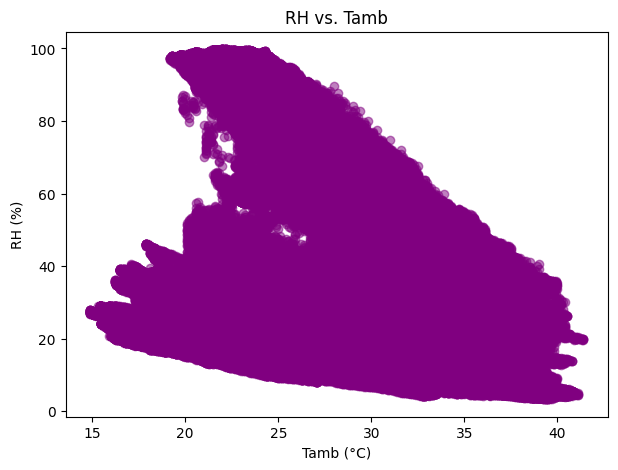

In [53]:
plt.figure(figsize=(7, 5))

plt.scatter(clean_togo_data['Tamb'], clean_togo_data['RH'], alpha=0.5, color='purple')
plt.title('RH vs. Tamb')
plt.xlabel('Tamb (°C)')
plt.ylabel('RH (%)')

plt.show()

## Option B: RH vs. GHI

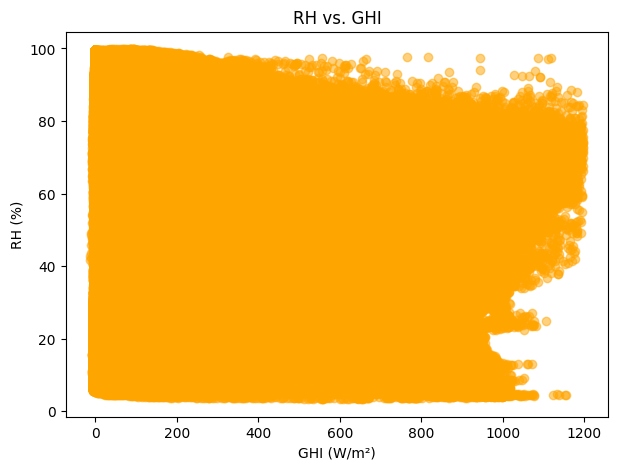

In [54]:
plt.figure(figsize=(7, 5))

plt.scatter(clean_togo_data['GHI'], clean_togo_data['RH'], alpha=0.5, color='orange')
plt.title('RH vs. GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('RH (%)')

plt.show()


## Wind & Distribution Analysis

### Wind rose or radial bar plot of WS/WD.

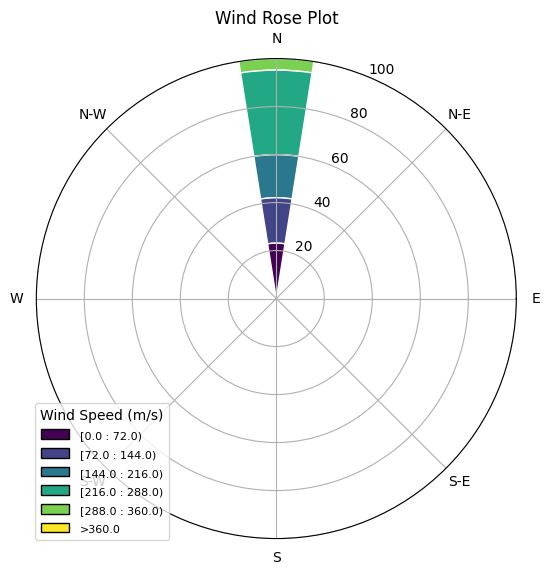

In [55]:
from windrose import WindroseAxes
# Create windrose plot
fig = plt.figure(figsize=(8, 6))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(clean_togo_data['WS'], clean_togo_data["WD"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title("Wind Rose Plot")
plt.show()

## Histograms for GHI and one other variable (e.g. WS).

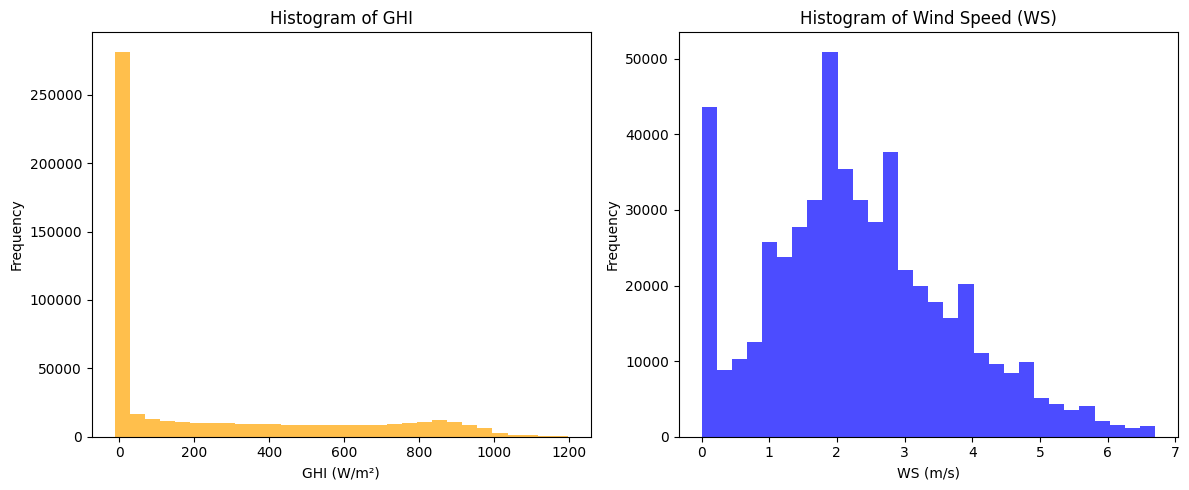

In [56]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
plt.hist(clean_togo_data['GHI'], bins=30, color='orange', alpha=0.7)
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for WS
plt.subplot(1, 2, 2)
plt.hist(clean_togo_data['WS'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Temperature Analysis

1. Scatter Plots

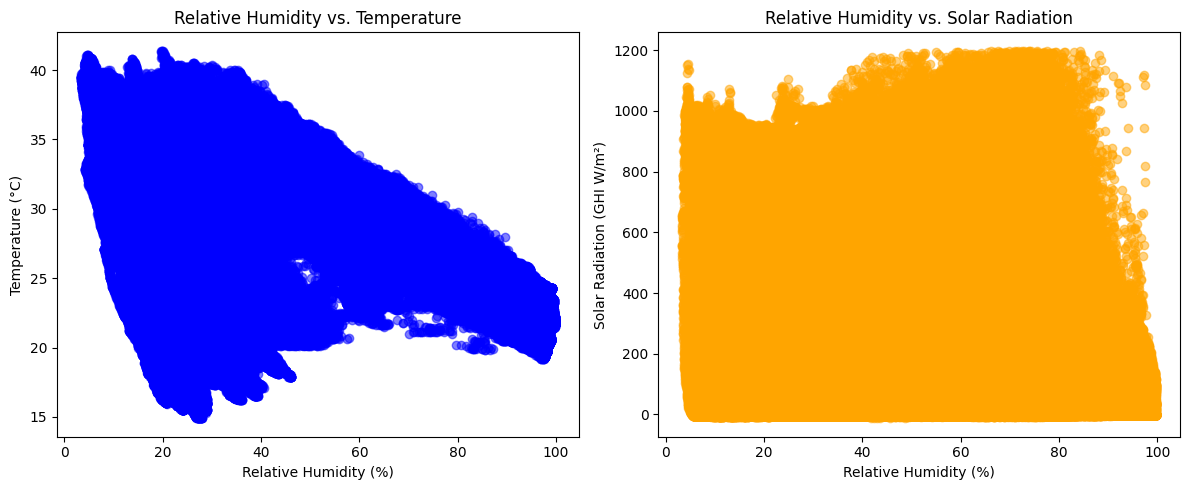

In [57]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Scatter plot for RH vs. Temperature
plt.subplot(1, 2, 1)
plt.scatter(clean_togo_data['RH'], clean_togo_data['Tamb'], alpha=0.5, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
# Scatter plot for RH vs. GHI
plt.subplot(1, 2, 2)
plt.scatter(clean_togo_data['RH'], clean_togo_data['GHI'], alpha=0.5, color='orange')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.tight_layout()
plt.show()

2. Statistical Analysis

In [58]:
# Calculate correlation coefficients
correlation_temp = clean_togo_data['RH'].corr(clean_togo_data['Tamb'])
correlation_solar = clean_togo_data['RH'].corr(df['GHI'])

print(f'Correlation between RH and Temperature: {correlation_temp:.2f}')
print(f'Correlation between RH and Solar Radiation: {correlation_solar:.2f}')

Correlation between RH and Temperature: -0.40
Correlation between RH and Solar Radiation: -0.87


## Bubble Chart

Option 1: Using Relative Humidity (RH)

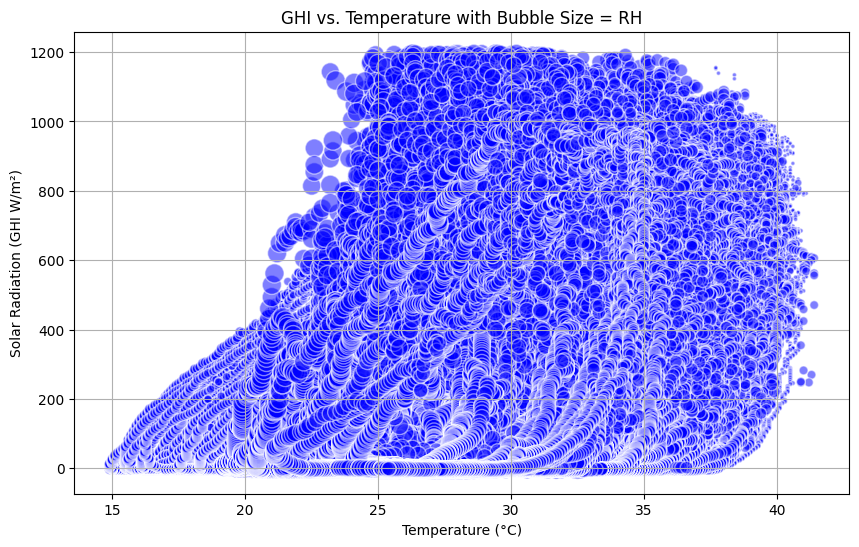

In [ ]:
# Set the figure size 
plt.figure(figsize=(10, 6))

# Create scatter plot with bubble sizes based on RH
plt.scatter(clean_togo_data['Tamb'], clean_togo_data['GHI'], s=clean_togo_data['RH']*2, alpha=0.5, color='blue', edgecolors='w')

# Adding titles and labels
plt.title('GHI vs. Temperature with Bubble Size = RH')
plt.xlabel('Temperature (°C)') 
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.grid()
plt.show()